# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

Kaggle link of dataset : *https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset*

In [3]:
resume_data = pd.read_csv('/content/Resume.csv')


#viewing the dataset
resume_data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# **Dropping unnecessary columns**
In this case, we do not need the ID column and the Resume_html column

In [4]:
resume_data.drop('Resume_html', inplace=True, axis=1)
resume_data.drop('ID', inplace=True, axis=1)
resume_data.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


# **Text Pre-processing**

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

**The text data is pre-processed using regular expression and RegexpTokenizer is used that splits a string into substrings using a regular expression.**

The function data_preprocess that takes raw text (a resume), cleans it by removing HTML tags, URLs, digits, stopwords, and short words, and returns the cleaned and preprocessed text.

In [7]:
def data_preprocess(txt):
    txt = str(txt)
    txt = txt.lower()#Converting all text to lowercase
    txt = txt.replace('{html}',"") # Removing the string "{html}" from the text
    cleanr = re.compile('<.*?>') #Creating a regular expression pattern to match and remove HTML tags
    cleantext = re.sub(cleanr, '', txt)
    rem_url = re.sub(r'http\S+', '',cleantext) #Removes URLs from the text using a regular expression pattern that matches URLs
    rem_num = re.sub('[0-9]+', '', rem_url) #Removes numerical digits from the text
    tokenizer = RegexpTokenizer(r'\w+') #Initializes a tokenizer that splits text into words based on word boundaries
    tokens = tokenizer.tokenize(rem_num) #Tokenizes the cleaned text, splitting it into individual words
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] #Filters out words that are less than 3 characters long and removes common English stopwords.

    return " ".join(filtered_words)


**Checking a random string to visulize the pre-processing techniques applied**

In [8]:
data_preprocess("HELLO WORLD, 123")

'hello world'

**Loading the Resume.csv file and applying the function called data_preprocess to the 'Resume_str' column of a DataFrame named resume_data**

In [9]:
#resume_data = pd.read_csv("/content/Resume.csv")
resume_data['preprocess'] = resume_data.Resume_str.apply(lambda x: data_preprocess(x))

In [10]:
resume_data

,Resume_str,Category,preprocess
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,administrator marketing associate administrato...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,specialist operations summary versatile media ...
2,HR DIRECTOR Summary Over 2...,HR,director summary years experience recruiting p...
3,HR SPECIALIST Summary Dedica...,HR,specialist summary dedicated driven dynamic ye...
4,HR MANAGER Skill Highlights ...,HR,manager skill highlights skills department sta...
...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,rank sgt non commissioned officer charge briga...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,government relations communications organizati...
2481,GEEK SQUAD AGENT Professional...,AVIATION,geek squad agent professional profile support ...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,program director office manager summary highly...


**Dropping "Resume_str" column**

In [11]:
resume_data.drop('Resume_str', inplace=True, axis=1)


In [12]:
resume_data.head()

,Category,preprocess
0,HR,administrator marketing associate administrato...
1,HR,specialist operations summary versatile media ...
2,HR,director summary years experience recruiting p...
3,HR,specialist summary dedicated driven dynamic ye...
4,HR,manager skill highlights skills department sta...


In [13]:
resume_data.preprocess[4]

'manager skill highlights skills department startup three new organization startups employment law fmla ada eeo mediation advocacy policies procedures staff recruitment retention salary negotiations employee relations benefits administration unemployment administration worker compensation administration orientation boarding hris technologies training development performance management organizational development program project management hris applications lawson paychex kronos adp office word excel powerpoint publisher access visio outlook professional experience manager jan current company name city state manage human resource function cycle corporate office well fulfillment data center consisting benefits compensation administration payroll employee relations policy compliance recruitment key results foster associate oriented culture emphasizes continuous improvement team work high performance quality ensure organizational conformation applicable related regulations statutes well org

**Displays a concise summary of the DataFrame resume_data, which provides information about the columns, their data types, non-null values, and memory usage.**

In [14]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    2484 non-null   object
 1   preprocess  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [15]:
missing_values = resume_data.isnull()
print(missing_values)

      Category  preprocess
0        False       False
1        False       False
2        False       False
3        False       False
4        False       False
...        ...         ...
2479     False       False
2480     False       False
2481     False       False
2482     False       False
2483     False       False

[2484 rows x 2 columns]


**Counts the occurrences of unique values in the "Category" column of the DataFrame resume_data**

In [16]:
resume_data["Category"].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

# **A visual representation of each category's frequency in the dataframe**

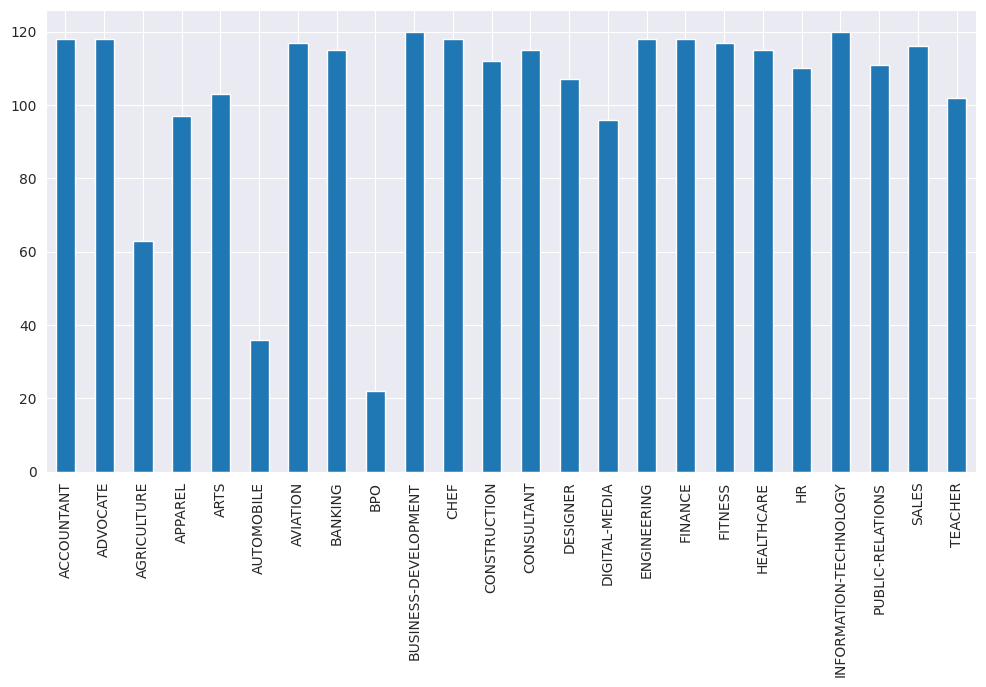

In [17]:
resume_data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

**Printing all unique categories present in the dataset**

In [18]:
all_category = resume_data["Category"].unique()
all_category

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

**Sorting the elements in the all_category array in ascending order**

In [19]:
all_category = np.sort(all_category)
all_category

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

 **The resume_categories list will contain DataFrames where each DataFrame includes preprocessed text data and category information for a specific category**

In [20]:
resume_categories = [resume_data[resume_data['Category'] == category].loc[:, ['preprocess', 'Category']] for category in all_category]
resume_categories[5]

,preprocess,Category
1321,automobile transporter professional summary de...,AUTOMOBILE
1322,automobile service manager summary attentive a...,AUTOMOBILE
1323,datastage etl developer summary years etl expe...,AUTOMOBILE
1324,policy service specialist iii professional sum...,AUTOMOBILE
1325,claims service manger professional summary ser...,AUTOMOBILE
1326,deputy principal executive profile results ori...,AUTOMOBILE
1327,technical educations languages summary lead su...,AUTOMOBILE
1328,director executive profile forward thinker exp...,AUTOMOBILE
1329,contact center specialist summary accomplished...,AUTOMOBILE
1330,recruiter career overview mature professional ...,AUTOMOBILE


**Utilizing scikit-learn's LabelEncoder to transform the categorical values in the "Category" column of the DataFrame resume_data into numerical labels**

In [21]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LabelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,preprocess,LabelEncoding
0,HR,administrator marketing associate administrato...,19
1,HR,specialist operations summary versatile media ...,19
2,HR,director summary years experience recruiting p...,19
3,HR,specialist summary dedicated driven dynamic ye...,19
4,HR,manager skill highlights skills department sta...,19
...,...,...,...
2479,AVIATION,rank sgt non commissioned officer charge briga...,6
2480,AVIATION,government relations communications organizati...,6
2481,AVIATION,geek squad agent professional profile support ...,6
2482,AVIATION,program director office manager summary highly...,6


# **Model Building**

In [31]:
xtrain = resume_data['preprocess'].values
labels = resume_data['Category'].values

**Train, Test and Validation split**

In [32]:
x_train, x_test, y_train, y_test = train_test_split(xtrain,labels,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(xtrain,labels,test_size = 0.25,train_size =0.75)

In [33]:
x_train.shape, x_test.shape

((1863,), (497,))

## **TF-IDF Vectorization**

In [34]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [35]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)
#x_cv = tfidf_vector.transform(x_cv)

# **Decision Tree Classifier**
In this case, the basic decision tree classifier has been implemented but we further fine-tune the Decision Tree Classifier by adjusting its hyperparameters. Decision Trees can be prone to overfitting, so we consider using techniques like pruning to prevent this. We can nitialize GridSearchCV
 or RandomizedSearchCV for hyperparameter tuning.

In [36]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.91
Classification report for classifier DecisionTreeClassifier():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.97      0.93      0.95        30
              ADVOCATE       0.85      0.85      0.85        20
           AGRICULTURE       0.91      0.83      0.87        12
               APPAREL       0.86      0.95      0.90        20
                  ARTS       0.75      0.80      0.77        15
            AUTOMOBILE       1.00      0.86      0.92         7
              AVIATION       1.00      0.91      0.95        22
               BANKING       1.00      0.92      0.96        26
                   BPO       1.00      1.00      1.00         3
  BUSINESS-DEVELOPMENT       0.79      0.92      0.85        25
                  CHEF       0.96      0.93      0.95        28
          CONSTRUCTION       0.96      0.93      0.95        28
            CONSULTANT       0.87      0

# **Random Forest Classifier**

In [37]:
model_RF = RandomForestClassifier(n_estimators=250)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.91
Classification report for classifier RandomForestClassifier(n_estimators=250):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.91      0.97      0.94        30
              ADVOCATE       0.94      0.85      0.89        20
           AGRICULTURE       1.00      0.75      0.86        12
               APPAREL       0.95      0.95      0.95        20
                  ARTS       1.00      0.73      0.85        15
            AUTOMOBILE       1.00      0.86      0.92         7
              AVIATION       0.95      0.95      0.95        22
               BANKING       0.92      0.92      0.92        26
                   BPO       1.00      1.00      1.00         3
  BUSINESS-DEVELOPMENT       0.79      0.92      0.85        25
                  CHEF       1.00      0.96      0.98        28
          CONSTRUCTION       0.90      0.96      0.93        28
            CONSULTANT  

# **Support Vectore Machine (SVM) Classifier**

In [38]:
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [39]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.99
Accuracy of  test set    : 0.90
Classification report for classifier SVC():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.90      0.93      0.92        30
              ADVOCATE       0.77      0.85      0.81        20
           AGRICULTURE       1.00      0.75      0.86        12
               APPAREL       0.95      0.95      0.95        20
                  ARTS       0.79      0.73      0.76        15
            AUTOMOBILE       1.00      0.86      0.92         7
              AVIATION       0.95      0.91      0.93        22
               BANKING       1.00      0.96      0.98        26
                   BPO       1.00      1.00      1.00         3
  BUSINESS-DEVELOPMENT       0.71      1.00      0.83        25
                  CHEF       1.00      0.89      0.94        28
          CONSTRUCTION       0.90      0.96      0.93        28
            CONSULTANT       0.88      0.79      0.84      

# **Logistic Regression**
Logistic regression is used for categorical outcome variables and in this case, our labels are categorical, not continuous

In [40]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.86
Accuracy of  test set    : 0.80
Classification report for classifier LogisticRegression():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.88      0.97      0.92        30
              ADVOCATE       0.71      0.75      0.73        20
           AGRICULTURE       1.00      0.33      0.50        12
               APPAREL       0.90      0.90      0.90        20
                  ARTS       0.90      0.60      0.72        15
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.84      0.95      0.89        22
               BANKING       0.89      0.92      0.91        26
                   BPO       0.00      0.00      0.00         3
  BUSINESS-DEVELOPMENT       0.64      0.92      0.75        25
                  CHEF       0.96      0.86      0.91        28
          CONSTRUCTION       0.83      0.89      0.86        28
            CONSULTANT       0.82      0.48 

# **Evaluating the performances of the 4 Machine Learning Techniques used**

In [41]:
Evaluation = {"Models":["DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression"],\
            "Train_Accuracy(%)":[model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 ],
            "Test_Accuracy(%)":[accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr],\
            "Precision(%)":[precision_DT,precision_RF,precision_svm,precision_lgr],\
            "Recall(%)":[recall_DT,recall_RF,recall_svm,recall_lgr],\
            "F1-Score(%)":[f1_DT,f1_RF,f1_svm,f1_lgr]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,DecisionTree Classifier,1.000000,0.91,0.91,0.90,0.91
1,RandomForest Classifier,1.000000,0.91,0.92,0.91,0.91
2,SVM Classifier,0.993559,0.90,0.91,0.89,0.90
3,Logistic Regression,0.860440,0.80,0.75,0.74,0.73


 **Saving the trained model's state so that you can later load it and make predictions without needing to retrain the model. Random Forest Classifier model was chosen because it performs the best out of the 4 models with:**


*   Train_accuracy = 1.0
*   Test_accuracy = 0.91
*   Precision = 0.92
*   Recall = 0.91
*   F1-Score = 0.91








In [42]:
import pickle
filename = 'modelRF.pkl'
pickle.dump(model_RF,open(filename,'wb'))

**Saving a trained TF-IDF vectorizer (tfidf_vector) to a file named 'vector.pkl' which can be useful if we want to save the vectorizer's state and later load it for transforming new text data consistently.**

In [43]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))